Importing All Essential Libraries

In [ ]:
#Importing the essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")
import pandas.util.testing as tm 

Since Our Dataset is Very Large. We hosted our dataset on cloud and Google Colab!

Import Library For Mounting Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
root_path = 'gdrive/My Drive/'

Reading Dataset

In [ ]:
loan_df = pd.read_csv('/content/drive/My Drive/loan.csv')

**Data Cleaning**

Checking and Removing Columns With More Than 40% null values

In [ ]:
check_null = loan_df.isnull().sum(axis=0).sort_values(ascending=False)/float(len(loan_df))
check_null[check_null>0.4]

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
orig_projected_additional_accrued_interest    0.996273
hardship_start_date                           0.995305
hardship_end_date                             0.995305
payment_plan_start_date                       0.995305
hardship_length                               0.995305
hardship_dpd                                  0.995305
hardship_loan_status                          0.995305
hardship_payoff_balance_amount                0.995305
deferral_term                                 0.995305
hardship_last_payment_amount                  0.995305
hardship_status                               0.995305
hardship_reason                               0.995305
hardship_type                                 0.995305
hardship_amount                               0.995305
settlement_percentage                         0.985378
settlement

In [ ]:
remove = ['id', 'member_id', 'url', 'dti_joint','verification_status_joint','annual_inc_joint','il_util','mths_since_rcnt_il',
          'total_cu_tl','all_util','open_il_12m','total_bal_il','open_il_24m','inq_last_12m',
          'inq_fi','open_acc_6m','open_rv_12m','max_bal_bc','open_rv_24m','mths_since_last_record',
          'mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_recent_revol_delinq','desc',
         'mths_since_last_delinq']

In [ ]:
loan_df = loan_df.drop(remove, axis=1)

In [ ]:
loan_df['annual_inc'] = loan_df['annual_inc']/1000
loan_df['loan_amnt'] = loan_df['loan_amnt']/1000

Removing Empty Rows

In [ ]:
loan_df = loan_df[:-2]

Filling Null Values With 0

In [ ]:
loan_df = loan_df.fillna(0)
null_count = loan_df.isnull().sum()
null_count[null_count>0]

Series([], dtype: int64)

Converting String To Integer By Removing Symbols

In [ ]:
loan_df['term'] = loan_df['term'].str.replace('months','')
loan_df['emp_length'] = loan_df['emp_length'].str.replace('+','')
loan_df['emp_length'] = loan_df['emp_length'].str.replace('<','')
loan_df['emp_length'] = loan_df['emp_length'].str.replace('years','')
loan_df['emp_length'] = loan_df['emp_length'].str.replace('year','')

In [ ]:
loan_df['emp_length'] = pd.to_numeric(loan_df['emp_length'])
loan_df['emp_length'] = loan_df.emp_length.fillna(0)
loan_df['term'] = pd.to_numeric(loan_df['term'])

**Data Analysis For Selecting Columns For Prediction of Charged Off Loans**

Bar Graph To Determine Loans Distributed to Individuals Length Of Employement

Text(0.5, 0, 'Length of Employment')

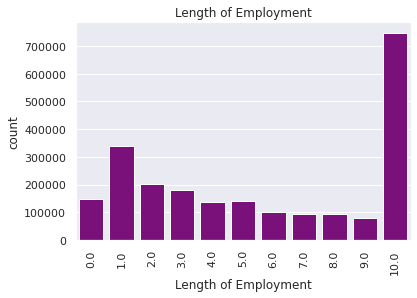

In [ ]:
#More loans were disbursed to individuals who have worked 10 or more years.
sns.set(style="darkgrid")
ax = sns.countplot(x="emp_length", data=loan_df, color="darkmagenta")
plt.rcParams['figure.figsize']=(5,4)
plt.xticks(rotation=90)
ax.set_title('Length of Employment', fontsize=12)
plt.xlabel('Length of Employment', fontsize=12)

Percent Of Loan Distributed Among Individuals Length Of Employement

In [ ]:
emp_length_grouped = loan_df.groupby('emp_length').size().sort_values(ascending=False)/len(loan_df) * 100
emp_length_grouped

emp_length
10.0    33.087816
1.0     14.968642
2.0      9.009602
3.0      7.995520
0.0      6.498350
5.0      6.179506
4.0      6.042688
6.0      4.539724
7.0      4.100340
8.0      4.065793
9.0      3.512018
dtype: float64

In [ ]:
loan_df['dti'] = loan_df['dti'].replace(9999, np.NaN)

In [ ]:
loan_df['dti'].fillna((loan_df['dti'].mean()), inplace=True)

Histogram: - Debt to Income Ratio

Text(0.5, 1.0, 'Debt to Income Ratio')

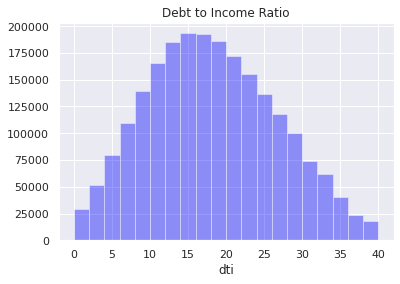

In [ ]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(6,4)
ax = sns.distplot(loan_df['dti'], bins=20, kde=False, hist_kws={'range':(0,40)}, color="blue")
ax.set_title('Debt to Income Ratio', fontsize=12)

Histogram: - Annual Income Of Individuals

Text(0.5, 1.0, "Annual Income in '000s")

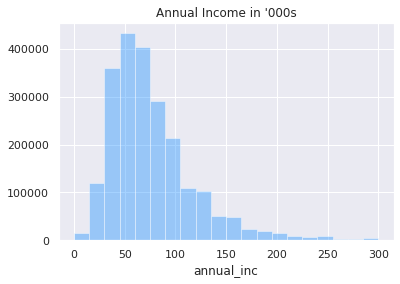

In [ ]:
sns.set(style="darkgrid")
plt.rcParams['figure.figsize']=(6,4)
ax = sns.distplot(loan_df['annual_inc'], bins=20, kde=False, hist_kws={'range':(0,300)}, color="dodgerblue")
ax.set_title('Annual Income in \'000s', fontsize=12)

Bar Graph: - Purpose for which individuals took loan

Text(0.5, 1.0, 'Purpose of Loan')

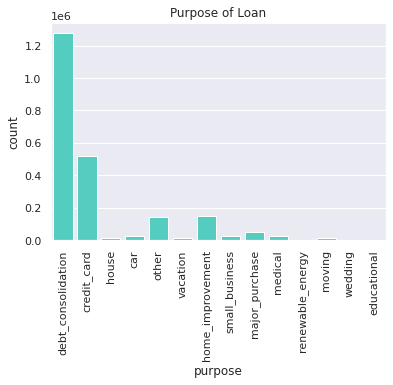

In [ ]:
sns.set(style="darkgrid")
ax = sns.countplot(x="purpose", data=loan_df, color="turquoise")
plt.rcParams['figure.figsize']=(6,4)
plt.xticks(rotation=90)
ax.set_title('Purpose of Loan', fontsize=12)

Status of all the loans distributed by lending club.

In [ ]:
loan_status_grouped = loan_df.groupby('loan_status').size().sort_values(ascending=False)/len(loan_df) * 100
loan_status_grouped

loan_status
Fully Paid                                             46.090488
Current                                                40.682392
Charged Off                                            11.574244
Late (31-120 days)                                      0.968608
In Grace Period                                         0.395990
Late (16-30 days)                                       0.165305
Does not meet the credit policy. Status:Fully Paid      0.087939
Does not meet the credit policy. Status:Charged Off     0.033663
Default                                                 0.001371
dtype: float64

In [ ]:
#Looking at loan status that are Fully Paid and Charged Off 
loan_df = loan_df[(loan_df["loan_status"] == "Fully Paid") |
                            (loan_df["loan_status"] == "Charged Off")]

di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
loan_df= loan_df.replace({"loan_status": di})


Features needed to be converted to boolean. Removed objects that have more than 15 unique variables. Removed columns that constitute <10% of total data. Drop correlated features. Further removed columns that do not add value to the models.

In [ ]:
loan_df['term'] = np.where(loan_df['term']==36, 1, 0)
loan_df['delinq_2yrs'] = np.where(loan_df['delinq_2yrs']>0, 1, 0)
loan_df['inq_last_6mths'] = np.where(loan_df['inq_last_6mths']>0, 1, 0)

In [ ]:
categorical = loan_df.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

grade
7
sub_grade
35
emp_title
371436
home_ownership
6
verification_status
3
issue_d
139
pymnt_plan
1
purpose
14
title
61679
zip_code
944
addr_state
51
earliest_cr_line
738
initial_list_status
2
last_pymnt_d
135
next_pymnt_d
1
last_credit_pull_d
140
application_type
2
sec_app_earliest_cr_line
561
hardship_flag
2
hardship_type
2
hardship_reason
10
hardship_status
4
hardship_start_date
27
hardship_end_date
25
payment_plan_start_date
26
hardship_loan_status
6
disbursement_method
2
debt_settlement_flag
2
debt_settlement_flag_date
83
settlement_status
4
settlement_date
89


In [ ]:
for col in loan_df.columns:
    if (len(loan_df[col].unique()) < 4):
        print(loan_df[col].value_counts())
        print()

1    988754
0    314853
Name: term, dtype: int64

Source Verified    503726
Verified           407676
Not Verified       392205
Name: verification_status, dtype: int64

0    1041952
1     261655
Name: loan_status, dtype: int64

n    1303607
Name: pymnt_plan, dtype: int64

0    1052490
1     251117
Name: delinq_2yrs, dtype: int64

0    744275
1    559332
Name: inq_last_6mths, dtype: int64

w    751214
f    552393
Name: initial_list_status, dtype: int64

0.0    1303607
Name: out_prncp, dtype: int64

0.0    1303607
Name: out_prncp_inv, dtype: int64

0    1303607
Name: next_pymnt_d, dtype: int64

1    1303607
Name: policy_code, dtype: int64

Individual    1280370
Joint App       23237
Name: application_type, dtype: int64

N    1303606
Y          1
Name: hardship_flag, dtype: int64

0                                  1298272
INTEREST ONLY-3 MONTHS DEFERRAL       5335
Name: hardship_type, dtype: int64

0.0    1298272
3.0       5335
Name: deferral_term, dtype: int64

0.0    1298272
3.0       

Dropping the columns that are >80% correlated

In [ ]:
remove3 = ['grade','emp_title','title','zip_code','addr_state','earliest_cr_line','last_pymnt_d',
          'last_credit_pull_d','policy_code','application_type','pymnt_plan','issue_d','out_prncp','next_pymnt_d',
          'out_prncp_inv']

In [ ]:
df = loan_df.drop(remove3, axis=1)

Removing Column Who Do Not Add Value For Prediction Models

In [ ]:
#Further removal of columns that do not add value.
remove4 = ['funded_amnt','funded_amnt_inv','total_pymnt_inv','total_rec_prncp','total_rec_int',
          'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','recoveries',
          'collection_recovery_fee','collections_12_mths_ex_med','total_rev_hi_lim',
          'acc_open_past_24mths','bc_open_to_buy','bc_util','mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
          'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75','tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit']

In [ ]:
df = df.drop(remove4, axis=1)

Correlation Matrix between remaining variables

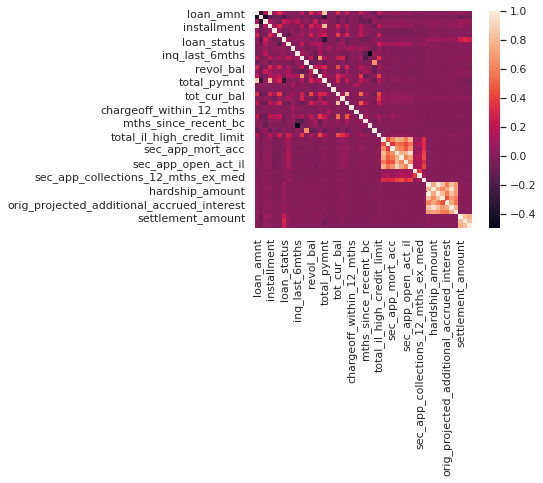

In [ ]:
#Creating a correlation matrix.
corrmat = df.corr()
#Find correlation between the different variables.
f, ax = plt.subplots()
sns.heatmap(corrmat,square=True)

In [ ]:
df.columns.unique()

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_pymnt', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'open_act_il', 'avg_cur_bal', 'chargeoff_within_12_mths',
       'delinq_amnt', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_inq', 'pub_rec_bankruptcies',
       'total_il_high_credit_limit', 'revol_bal_joint',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med',
       'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
       'hardship_reason', 'hard

Removing all remaining irrelevant columns

In [ ]:
remove5 = ['total_il_high_credit_limit','installment','revol_util','revol_bal','pub_rec',
           'delinq_amnt','avg_cur_bal','open_acc','total_acc','mort_acc','mths_since_recent_bc', 'chargeoff_within_12_mths',
           'revol_bal_joint',
            'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
            'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
            'sec_app_open_act_il', 'sec_app_num_rev_accts',
            'sec_app_chargeoff_within_12_mths',
            'sec_app_collections_12_mths_ex_med',
            'sec_app_mths_since_last_major_derog', 'hardship_flag', 'hardship_type',
            'hardship_reason', 'hardship_status', 'deferral_term',
            'hardship_amount', 'hardship_start_date', 'hardship_end_date',
            'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
            'hardship_loan_status', 'orig_projected_additional_accrued_interest',
            'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
            'disbursement_method', 'debt_settlement_flag',
            'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
            'settlement_amount', 'settlement_percentage', 'settlement_term']
df = df.drop(remove5, axis=1)

Final Correlation Matrix

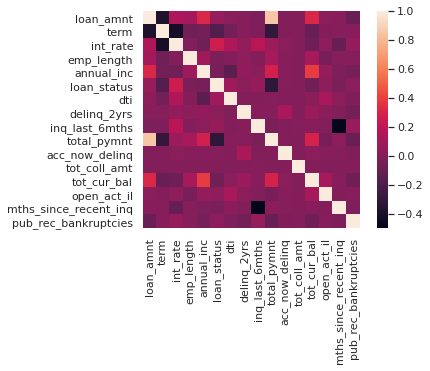

In [ ]:
#Creating a correlation matrix.
corrmat = df.corr()
#Find correlation between the different variables.
f, ax = plt.subplots()
sns.heatmap(corrmat,square=True)

In [ ]:
df = pd.concat([df.drop('home_ownership', axis=1), pd.get_dummies(df['home_ownership'])], axis=1)
df = pd.concat([df.drop('initial_list_status', axis=1), pd.get_dummies(df['initial_list_status'])], axis=1)
df = pd.concat([df.drop('purpose', axis=1), pd.get_dummies(df['purpose'])], axis=1)
df = pd.concat([df.drop('sub_grade', axis=1), pd.get_dummies(df['sub_grade'])], axis=1)
df = pd.concat([df.drop('verification_status', axis=1), pd.get_dummies(df['verification_status'])], axis=1)

In [ ]:
X = df.drop('loan_status', 1)
y = df['loan_status'].astype(int)

Diving Dataset Into Training and Testing Data

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1042885, 75) (1042885,)
(260722, 75) (260722,)


Percentage of Total Variance in the Dataset Explained by Each Component From Sklearn PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=10)
X = X.dropna(axis=1)
y_sklearn = sklearn_pca.fit_transform(X_train)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [9.91571431e-01 4.49039948e-03 3.93798884e-03 1.72097340e-07
 4.72095693e-09 1.44017942e-09 9.56369952e-10 6.96680831e-10
 5.51029655e-10 2.03074343e-10]


In [ ]:
pc_components = pd.DataFrame(sklearn_pca.components_,columns=X.columns,index = ['PC-1','PC-2','PC-3',
                                                            'PC-4','PC-5','PC-6',
                                                             'PC-7','PC-8','PC-9','PC-10'])
print(pc_components.loc["PC-1"].idxmax())
print(pc_components.loc["PC-1"].max())

tot_cur_bal
0.9998119430614211


First Model: - Linear Regression

In [ ]:
#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print('Accuracy of linear regression classifier on test set: {:.5f}'.format(linreg.score(X_test, y_test)))

linregscores = cross_val_score(linreg, X, y, cv=10)
print(linregscores)
print ('\nMean cross validation score is: ' + str(np.mean(linregscores)))

Accuracy of linear regression classifier on test set: 0.56918
[0.57036592 0.59581273 0.60487313 0.59106236 0.5805004  0.61969139
 0.52262586 0.47530281 0.53358051 0.50487323]

Mean cross validation score is: 0.5598688344346092


Second Model: - Logistic Regression

In [ ]:
#Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Accuracy of logistic regression classifier on test set: {:.5f}'.format(logreg.score(X_test, y_test)))

logregscores = cross_val_score(logreg, X, y, cv=10)
print(logregscores)
print ('\nMean cross validation score is: ' + str(np.mean(logregscores)))

Accuracy of logistic regression classifier on test set: 0.94476
[0.95643636 0.91357078 0.91283436 0.95272359 0.94772209 0.93611586
 0.96301808 0.92002148 0.92760816 0.92126419]

Mean cross validation score is: 0.9351314955345789


Confusion Matrix For Training Dataset of Logistic Regression Model

In [ ]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix for train set.
confusion_matrix(y_train,(logreg.predict(X_train)).round())

array([[819103,  14219],
       [ 42137, 167426]])

Confusion Matrix For Testing Dataset of Logistic Regression Model

In [ ]:
#Confusion Matrix for test set.
confusion_matrix(y_test,(logreg.predict(X_test)).round())

array([[204928,   3702],
       [ 10700,  41392]])

Third Model: - Random Forest Classifier

In [ ]:
#Random Forest 
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train, y_train)

print('Accuracy of Random Forest Classifier: {:.5f}'.format(rfc.score(X_test, y_test)))

cvScores = cross_val_score(rfc, X, y, cv=10) 
print(cvScores)
print ('\nMean cross validation score is: ' + str(np.mean(cvScores)))

Accuracy of Random Forest Classifier: 0.96076
[0.98070742 0.961691   0.97042827 0.95652841 0.95511694 0.96353204
 0.98332323 0.93057686 0.94569653 0.94838908]

Mean cross validation score is: 0.959598978730198


Confusion Matrix of Testing Dataset of Random Forest Classifier

In [ ]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix for test set.
confusion_matrix(y_test,(rfc.predict(X_test)).round())

array([[208078,     87],
       [ 10143,  42414]])

Top Ten Important Variables Based On Random Forest Classifier

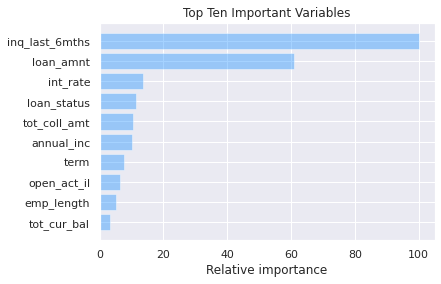

In [ ]:
feature_importance = rfc.feature_importances_

#Make importances relative to max importance.
feature_importance = 100 * (feature_importance / feature_importance.max())
indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10), np.array(df.columns)[indices])
_ = plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

Fourth Model: - Gradient Boosting Classifier

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

param_grid = {'n_estimators': 100,
         'max_depth':3,
         'loss': 'deviance',
         'subsample': 0.8,
         'max_features': 'auto',
         'learning_rate':0.05,
         'min_samples_leaf':3}

clf = ensemble.GradientBoostingClassifier(**param_grid, random_state=0)
clf.fit(X_train, y_train)

print('Accuracy of Gradient Boosting Classifier on Test: {:.5f}'.format(clf.score(X_test, y_test)))

clf_scores = cross_val_score(clf, X, y, cv=10)
print(clf_scores)
print ('\nMean cross validation score is: ' + str(np.mean(clf_scores)))

Accuracy of Gradient Boosting Classifier on Test: 0.95850
[0.98117535 0.95845383 0.9707658  0.95146555 0.94700102 0.95849986
 0.98610781 0.93027002 0.93557073 0.94637159]

Mean cross validation score is: 0.9565681547489933


Confusion Matrix For Training Dataset Of Gradient Boosting Classifier

In [ ]:
from sklearn.metrics import confusion_matrix
#Confusion Matrix for train set.
confusion_matrix(y_train,(clf.predict(X_train)).round())

array([[833399,    388],
       [ 42841, 166257]])

Fifth Model: - Naive Bayes Classifier

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
    
#Testing Naive Bayes Classifier
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
    
y_pred = BNB.predict(X_test)

print('Accuracy of Bernoulli classifier: {:.5f}'.format(BNB.score(X_test, y_test)))

BNB_scores = cross_val_score(BNB, X, y, cv=10)
print(BNB_scores)
print ('\nMean cross validation score is: ' + str(np.mean(BNB_scores)))

Accuracy of Bernoulli classifier: 0.80055
[0.77593759 0.78327874 0.7910418  0.79806077 0.79382637 0.76480696
 0.74682612 0.78873121 0.7837757  0.784305  ]

Mean cross validation score is: 0.7810590259448037
